## logistic regression model

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### load cleaned feature data table

In [2]:
df = pd.read_feather('../data/processed/df_to_model_copd')

In [3]:
df.columns

Index(['time_on_vent', 'anchor_age', 'spontrr', 'heartrate', 'std_spontrr',
       'weight', 'sodium', 'abg_po2', 'abg_ph', 'hco3', 'abg_pco2',
       'bloodpressure', 'std_pulseox', 'std_heartrate', 'creatinine', 'bun',
       'height', 'lactic_acid', 'hemoglobin', 'wbg', 'tidalvolume', 'temp',
       'std_bloodpressure', 'tidal_weight', 'bmi', 'pulseox', 're_intub_class',
       'gender', 'admission_type'],
      dtype='object')

In [4]:
df.drop(['admission_type','time_on_vent'],axis=1,inplace=True)

In [5]:
df

,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,abg_pco2,...,hemoglobin,wbg,tidalvolume,temp,std_bloodpressure,tidal_weight,bmi,pulseox,re_intub_class,gender
0,4.110874,3.135494,4.828314,2.212708,4.949469,4.897840,4.262680,2.135349,3.367296,3.761200,...,2.292535,1.931521,6.135565,3.622858,2.991061,1.456405,2.971638,0.155719,0,M
1,4.356709,3.044522,4.574711,1.848287,4.890349,5.010635,4.867534,2.128232,3.401197,3.761200,...,2.370244,2.501436,6.144186,3.640506,2.605496,1.509115,3.077024,-0.143003,0,F
2,4.304065,3.332205,4.499810,1.833153,5.043425,4.905275,4.595120,2.122262,3.178054,3.828641,...,2.468100,0.470004,6.280396,3.601868,2.665651,1.495382,3.138509,0.469383,1,M
3,3.663562,2.833213,4.465908,1.980311,5.098646,4.955827,4.330733,2.115050,3.135494,3.761200,...,2.468100,3.058707,6.163315,3.628776,2.755563,1.363933,3.335940,-0.764086,0,F
4,4.110874,3.526361,4.653960,1.589264,5.071417,4.955827,4.394449,2.130610,3.135494,3.496508,...,2.442347,2.906901,5.961005,3.669243,1.478474,1.236396,3.403098,-0.143003,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,4.204693,2.944439,4.276666,1.405311,5.619676,5.017280,4.290459,2.124654,3.637586,4.127134,...,2.341806,2.251292,6.011267,3.634658,1.933442,0.908693,3.786020,5.199338,0,M
705,4.143135,2.833213,4.624973,1.941639,5.403128,4.897840,4.770685,2.118662,3.044522,3.850148,...,2.163323,3.310543,6.315358,3.636123,1.230260,1.251793,3.380260,-0.436868,0,M
706,4.356709,2.772589,4.488636,1.905745,5.031744,4.976734,5.379897,2.111425,3.401197,4.204693,...,2.208274,2.785011,5.880533,3.686098,2.019496,1.207645,3.427497,0.469383,0,F
707,4.248495,2.890372,4.477337,1.301786,5.015954,4.976734,4.248495,2.122262,3.663562,4.189655,...,2.151762,2.388763,6.639876,3.637586,1.784479,1.808311,3.223819,5.199338,0,M


## Handle categoricals

In [6]:
X = df[df.columns.drop(['re_intub_class'])]
y = df['re_intub_class']

In [7]:
# Import libraries 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [8]:
numeric_features  = df[df.columns.drop(['gender','re_intub_class'])].columns
numeric_transformer = Pipeline(steps=[
   # ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = df[['gender']].columns
categorical_transformer = Pipeline(steps=[
   # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#The order of the columns in the transformed feature matrix follows the order 
#of how the columns are specified in the transformers list. Columns of the original 
#feature matrix that are not specified are dropped from the resulting transformed feature matrix,
#unless specified in the passthrough keyword. Those columns specified with passthrough 
#are added at the right to the output of the transformers.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 101)

In [10]:
numeric_feature_names = preprocessor.transformers[0][2]

In [11]:
training_data = X_train.copy()
training_data.reset_index(inplace=True)
training_data.drop('index',axis=1,inplace=True)

In [12]:
training_data.to_feather("strip_train_data")

In [13]:
scaled_train = preprocessor.fit_transform(X_train)

In [14]:
categs= preprocessor.named_transformers_['cat']['onehot']
onehot_features = categs.get_feature_names()
numeric_feature_names = preprocessor.transformers[0][2]
feature_names = np.concatenate((numeric_feature_names.tolist(),onehot_features))

In [15]:
feature_names

array(['anchor_age', 'spontrr', 'heartrate', 'std_spontrr', 'weight',
       'sodium', 'abg_po2', 'abg_ph', 'hco3', 'abg_pco2', 'bloodpressure',
       'std_pulseox', 'std_heartrate', 'creatinine', 'bun', 'height',
       'lactic_acid', 'hemoglobin', 'wbg', 'tidalvolume', 'temp',
       'std_bloodpressure', 'tidal_weight', 'bmi', 'pulseox', 'x0_F',
       'x0_M'], dtype=object)

In [16]:
scaled_test = preprocessor.transform(X_test) 

In [17]:
oversample = SMOTE(random_state = 101)
X_smote, y_smote = oversample.fit_resample(scaled_train, y_train)

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
#smote = RandomUnderSampler(random_state = 101, replacement = True)
#X_smote, y_smote= smote.fit_resample(scaled_train, y_train)

In [20]:
w = {0:90, 1:10}
w1 = {0:80, 1:20}
w2 = {0:70, 1:30}
w3 = {0:60, 1:40}

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter' : [1000],
    'class_weight': [w,w1,w2,w3]}]

rfc_param_grid=[
    {'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(4,28,4)),
    'class_weight' :[w,w1,w2,w3]}]

svc_param_grid ={ 'kernel':('linear', 'rbf'), 
                 'C': [0.1,1, 10, 100, 1000], 
                 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [21]:
clf = GridSearchCV(LogisticRegression(), param_grid,refit=True)
clf.fit(X_smote,y_smote)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'class_weight': [{0: 90, 1: 10}, {0: 80, 1: 20},
                                           {0: 70, 1: 30}, {0: 60, 1: 40}],
                          'max_iter': [1000], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}])

In [22]:
import statsmodels.api as sm

In [23]:
logit_model=sm.Logit(y_smote,X_smote)
result=logit_model.fit()
print(result.summary(alpha = 0.05))

Optimization terminated successfully.
         Current function value: 0.566629
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         re_intub_class   No. Observations:                 1028
Model:                          Logit   Df Residuals:                     1001
Method:                           MLE   Df Model:                           26
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.1825
Time:                        09:16:55   Log-Likelihood:                -582.49
converged:                       True   LL-Null:                       -712.56
Covariance Type:            nonrobust   LLR p-value:                 1.763e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0975      0.088      1.107      0.268      -0.075       0.270
x2            -0.1324      0.

In [24]:
result.params

x1      0.097500
x2     -0.132439
x3      0.059289
x4      0.045802
x5     62.688469
x6      0.144377
x7     -0.114827
x8      0.173391
x9     -0.664692
x10     0.366629
x11     0.282616
x12    -0.001068
x13    -0.017559
x14    -0.883194
x15     0.765365
x16   -24.416876
x17    -0.268385
x18    -0.722404
x19     0.718089
x20    -1.403918
x21     0.282844
x22    -0.112095
x23     1.602505
x24   -57.511424
x25    -0.398201
x26    -0.602777
x27    -0.480911
dtype: float64

In [25]:
clf.best_estimator_.coef_

array([[ 0.10110337, -0.09953724,  0.05400755,  0.04690541,  0.        ,
         0.11626648, -0.10435717,  0.03293629, -0.45668988,  0.16014826,
         0.26707993,  0.00093359, -0.02447736, -0.709747  ,  0.63046623,
         0.51078704, -0.23498806, -0.65468661,  0.59589923, -0.10414655,
         0.249077  , -0.09818519,  0.        , -0.1259068 , -0.33471311,
        -0.08937102,  0.        ]])

In [26]:
clf.best_estimator_

LogisticRegression(C=0.012742749857031334, class_weight={0: 60, 1: 40},
                   max_iter=1000, penalty='l1', solver='liblinear')

In [27]:
predictions = clf.predict(scaled_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       124
           1       0.22      0.44      0.30        18

    accuracy                           0.73       142
   macro avg       0.56      0.61      0.57       142
weighted avg       0.82      0.73      0.77       142

[[96 28]
 [10  8]]


(96, 28, 10, 8)

In [28]:
clf.predict_log_proba(scaled_test)

array([[-0.30435035, -1.33789438],
       [-1.43644762, -0.27150813],
       [-0.56193844, -0.84420936],
       [-0.36043059, -1.1952641 ],
       [-0.0502146 , -3.01645177],
       [-0.59521106, -0.80172657],
       [-0.83013334, -0.57268533],
       [-1.46444285, -0.26293323],
       [-0.29334288, -1.36950171],
       [-1.35070251, -0.29983321],
       [-0.25391455, -1.49502984],
       [-0.23767998, -1.55331742],
       [-0.10061124, -2.3463752 ],
       [-0.09595066, -2.39151293],
       [-1.06617329, -0.42208795],
       [-0.03847757, -3.27685699],
       [-0.18740748, -1.76671076],
       [-0.24370253, -1.5311848 ],
       [-0.03052232, -3.50451941],
       [-0.02348701, -3.76302842],
       [-0.99445031, -0.46191917],
       [-0.1490582 , -1.97702197],
       [-0.57977642, -0.8210341 ],
       [-0.19590094, -1.7264981 ],
       [-0.40302214, -1.10351621],
       [-0.55723029, -0.8504874 ],
       [-0.19795682, -1.71705251],
       [-0.02534518, -3.68781265],
       [-0.09400682,

In [29]:
train_predictions = clf.predict(scaled_train)
print(classification_report(y_train,train_predictions))
print(confusion_matrix(y_train,train_predictions))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       514
           1       0.22      0.53      0.31        53

    accuracy                           0.78       567
   macro avg       0.58      0.67      0.59       567
weighted avg       0.88      0.78      0.82       567

[[413 101]
 [ 25  28]]


In [30]:
probablities = clf.predict_proba(scaled_train)[:,1]

In [31]:
logit = np.log(probablities/(1-probablities))

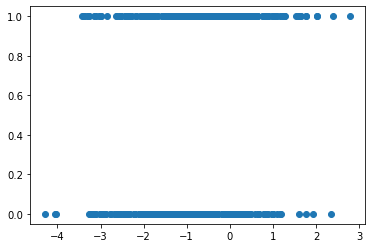

In [35]:
plt.scatter(logit,scaled_train[:,26])

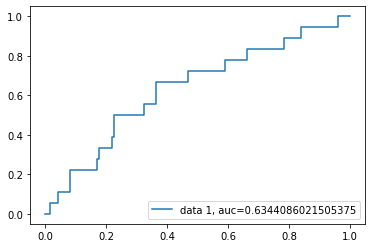

In [33]:
y_pred_proba = clf.predict_proba(scaled_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
np.savetxt('copd_fpr.txt',fpr)
np.savetxt('copd_tpr.txt',tpr)

#### Model explainability

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
X_test.reset_index(inplace=True)
X_test.drop(['index'],axis=1,inplace=True)

In [ ]:
X_test

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_smote,  
                              feature_names=feature_names,  
                              #class_names=['re_intub_class'], 
                              #categorical_features=categorical_features ,
                              verbose=True, 
                              mode='classification',
                              discretize_continuous=True)

In [ ]:
scaled_test[0,:]

In [ ]:
clf.predict(scaled_test[8,:].reshape(1,-1))
explog = explainer.explain_instance(scaled_test[0,:], clf.predict_proba, num_features=5)
explog.show_in_notebook(show_table=True)

In [ ]:
x = explog.show_in_notebook(show_table=True)

In [ ]:
explainer.feature_names

In [ ]:
explog.as_list()

In [ ]:
feature_list = explog.as_list()

In [ ]:
salient_feature = feature_list[2][0].split(' ')

In [ ]:
num_top_feats = len(feature_list)

In [ ]:
j = 0
for j in np.arange(num_top_feats):
    salient_feature = feature_list[j][0].split(' ')
    j = j+1
    for i in salient_feature:
        if i in feature_names:
            print (i)

#### 5. Evaulate model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
import joblib

In [ ]:
#joblib.dump(clf, "reintubate_model_strip.sav")

In [ ]:
#joblib.dump(preprocessor, "reintubate_preprocessor_strip.sav")

## Train model

### perform train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3. SMOTE IT!

from collections import Counter
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE(random_state = 101)

X_smote, y_smote = oversample.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

#### 4. Do logistic regression model

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000, C=0.0001)
logmodel.fit(X_smote,y_smote)

import pickle

In [ ]:
# Save the model as a pickle in a file 
#pickle.dump(logmodel, open("reintubate_model_log", 'wb')) 

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features  = df[df.columns.drop(['gender','admission_type','re_intub_class'])].columns
#numeric_transformer = ('scaler', StandardScaler())
numeric_transformer = make_column_transformer(
    (StandardScaler(), numeric_features),
    remainder='passthrough')


categorical_features = df[['gender','admission_type']].columns
#categorical_transformer =  ('onehot', OneHotEncoder(drop='first'))
categorical_transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_features),
    remainder='passthrough')

#preprocessor = make_column_transformer(
 #   transformers=[
  #      ('num', numeric_transformer, numeric_features),
   #     ('cat', categorical_transformer, categorical_features)],
#remainder ='passthrough')

clf = Pipeline(steps=[('num', numeric_transformer),
                      ('cat', categorical_transformer),
                      ('classifier', LogisticRegression())])

#### 2. Perform feature scaling

Because the range of values in the features are not necessarily in the same order of magnitude, we will scale the feature data prior to training the model.

* actually... they might not be far off! 

mask=['spontRR', 'stdABP', 'meanABP', 'stdSpontRR', 'pulseox', 'stdPulseox',
       'temp', 'heartRate', 'stdHeartRate', 'weight', 'height', 'anchor_age',
       'time_on_vent']

X_traina = X_train.copy()
X_testa = X_test.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.loc[:,mask])
X_traina.loc[:,mask] = scaler.transform(X_train.loc[:,mask])

#X_train = scaler.transform(X_train)
X_testa.loc[:,mask] = scaler.transform(X_test.loc[:,mask])